<a href="https://colab.research.google.com/github/plthiyagu/AI-Engineering/blob/master/08-Deep%20Learning/Hands_On_Project_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.analyticsvidhya.com/blog/2021/07/practicing-your-deep-learning-skills-a-hands-on-project-with-keras/?utm_source=feedburner&utm_medium=email&utm_campaign=Feed%3A+AnalyticsVidhya+%28Analytics+Vidhya%29

In [1]:
import numpy
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(10000,)

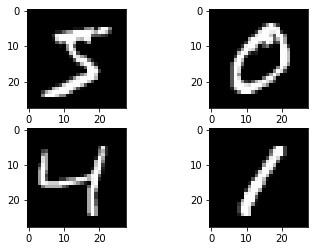

In [4]:
# Plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# Show the plot
plt.show()

In [5]:
num_pixels = X_train.shape[1] * X_train.shape[2]

784

In [6]:
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
X_train = X_train / 255 
X_test = X_test / 255
y_train = to_categorical(y_train) 
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

In [7]:
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(10000, 10)

In [8]:
# create model
model = Sequential()  
model.add(Dense(num_classes, input_dim=num_pixels, activation='softmax'))

In [9]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [10]:
# Training model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

Epoch 1/10
300/300 [==============================] - 1s 3ms/step - loss: 1.4939 - accuracy: 0.6313 - val_loss: 1.0016 - val_accuracy: 0.7987
Epoch 2/10
300/300 [==============================] - 1s 3ms/step - loss: 0.8669 - accuracy: 0.8182 - val_loss: 0.7302 - val_accuracy: 0.8414
Epoch 3/10
300/300 [==============================] - 1s 2ms/step - loss: 0.6940 - accuracy: 0.8436 - val_loss: 0.6185 - val_accuracy: 0.8583
Epoch 4/10
300/300 [==============================] - 1s 2ms/step - loss: 0.6105 - accuracy: 0.8561 - val_loss: 0.5565 - val_accuracy: 0.8693
Epoch 5/10
300/300 [==============================] - 1s 3ms/step - loss: 0.5600 - accuracy: 0.8640 - val_loss: 0.5159 - val_accuracy: 0.8753
Epoch 6/10
300/300 [==============================] - 1s 3ms/step - loss: 0.5254 - accuracy: 0.8693 - val_loss: 0.4872 - val_accuracy: 0.8800
Epoch 7/10
300/300 [==============================] - 1s 2ms/step - loss: 0.4999 - accuracy: 0.8736 - val_loss: 0.4657 - val_accuracy: 0.8822
Epoch 

In [11]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.4232 - accuracy: 0.8917
Baseline Error: 10.83%


Defining a Multi-Layer Neural Network Model

In [12]:
model = Sequential()
model.add(Dense(500, input_dim=num_pixels, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [13]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
# Training model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

Epoch 1/10
300/300 [==============================] - 4s 14ms/step - loss: 0.2800 - accuracy: 0.9200 - val_loss: 0.1322 - val_accuracy: 0.9617
Epoch 2/10
300/300 [==============================] - 4s 13ms/step - loss: 0.1026 - accuracy: 0.9701 - val_loss: 0.0900 - val_accuracy: 0.9727
Epoch 3/10
300/300 [==============================] - 4s 13ms/step - loss: 0.0648 - accuracy: 0.9809 - val_loss: 0.0738 - val_accuracy: 0.9762
Epoch 4/10
300/300 [==============================] - 4s 13ms/step - loss: 0.0454 - accuracy: 0.9864 - val_loss: 0.0654 - val_accuracy: 0.9788
Epoch 5/10
300/300 [==============================] - 4s 13ms/step - loss: 0.0321 - accuracy: 0.9902 - val_loss: 0.0651 - val_accuracy: 0.9796
Epoch 6/10
300/300 [==============================] - 4s 13ms/step - loss: 0.0249 - accuracy: 0.9927 - val_loss: 0.0619 - val_accuracy: 0.9819
Epoch 7/10
300/300 [==============================] - 4s 13ms/step - loss: 0.0184 - accuracy: 0.9946 - val_loss: 0.0708 - val_accuracy: 0.9784

In [15]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

313/313 [==============================] - 1s 3ms/step - loss: 0.0771 - accuracy: 0.9799
Baseline Error: 2.01%


Defining a deep Neural Network Model

In [16]:
model = Sequential()  
model.add(Dense(500, input_dim=num_pixels, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(50, activation = 'sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

In [17]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

313/313 [==============================] - 1s 3ms/step - loss: 2.4914 - accuracy: 0.1009
Baseline Error: 89.91%


In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 500)               392500    
_________________________________________________________________
dense_5 (Dense)              (None, 100)               50100     
_________________________________________________________________
dense_6 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                510       
Total params: 448,160
Trainable params: 448,160
Non-trainable params: 0
_________________________________________________________________


Save the Model

In [20]:
import h5py
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Training model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
model.save_weights('FC.h5')
# Final evaluation of the model
scores = model.evaluate(X_test, y_test)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 [==============================] - 5s 14ms/step - loss: 0.9940 - accuracy: 0.7497 - val_loss: 0.3611 - val_accuracy: 0.9088
Epoch 2/10
300/300 [==============================] - 4s 14ms/step - loss: 0.2879 - accuracy: 0.9238 - val_loss: 0.2206 - val_accuracy: 0.9370
Epoch 3/10
300/300 [==============================] - 4s 14ms/step - loss: 0.1973 - accuracy: 0.9458 - val_loss: 0.1706 - val_accuracy: 0.9520
Epoch 4/10
300/300 [==============================] - 4s 14ms/step - loss: 0.1490 - accuracy: 0.9579 - val_loss: 0.1417 - val_accuracy: 0.9593
Epoch 5/10
300/300 [==============================] - 4s 14ms/step - loss: 0.1167 - accuracy: 0.9671 - val_loss: 0.1214 - val_accuracy: 0.9639
Epoch 6/10
300/300 [==============================] - 4s 14ms/step - loss: 0.0953 - accuracy: 0.9733 - val_loss: 0.1067 - val_accuracy: 0.9678
Epoch 7/10
300/300 [==============================] - 4s 14ms/step - loss: 0.0766 - accuracy: 0.9780 - val_loss: 0.0967 - val_accuracy: 0.9713

Loading the saved Model


In [21]:
model = Sequential()
model.add(Dense(500, input_dim=num_pixels, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(50, activation = 'sigmoid'))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Final evaluation of the model
scores = model.evaluate(X_test, y_test)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

313/313 [==============================] - 1s 3ms/step - loss: 2.5498 - accuracy: 0.1009
Baseline Error: 89.91%


In [22]:
model.load_weights('FC.h5')
# Final evaluation of the model
scores = model.evaluate(X_test, y_test)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

313/313 [==============================] - 1s 3ms/step - loss: 0.0786 - accuracy: 0.9756
Baseline Error: 2.44%


Creating checkpoints of Model

In [23]:
from tensorflow.keras.callbacks import ModelCheckpoint
filepath='FC.h5'
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', save_best_only=True, mode='max')
callbacks_list = [checkpoint]
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, callbacks=callbacks_list)

Epoch 1/10
300/300 [==============================] - 5s 14ms/step - loss: 0.0364 - accuracy: 0.9901 - val_loss: 0.0778 - val_accuracy: 0.9755
Epoch 2/10
300/300 [==============================] - 4s 13ms/step - loss: 0.0292 - accuracy: 0.9922 - val_loss: 0.0742 - val_accuracy: 0.9787
Epoch 3/10
300/300 [==============================] - 4s 13ms/step - loss: 0.0227 - accuracy: 0.9941 - val_loss: 0.0731 - val_accuracy: 0.9777
Epoch 4/10
300/300 [==============================] - 4s 13ms/step - loss: 0.0191 - accuracy: 0.9952 - val_loss: 0.0737 - val_accuracy: 0.9787
Epoch 5/10
300/300 [==============================] - 4s 13ms/step - loss: 0.0156 - accuracy: 0.9961 - val_loss: 0.0786 - val_accuracy: 0.9765
Epoch 6/10
300/300 [==============================] - 4s 13ms/step - loss: 0.0133 - accuracy: 0.9962 - val_loss: 0.0731 - val_accuracy: 0.9790
Epoch 7/10
300/300 [==============================] - 4s 14ms/step - loss: 0.0094 - accuracy: 0.9978 - val_loss: 0.0743 - val_accuracy: 0.9793

Defining Learning Rate Decay and Other Parameters of Optimizer

In [24]:
from tensorflow.keras.optimizers import SGD, Adam
sgd = SGD(lr = 0.001, momentum = 0.0005, decay = 0.0005)   # 0.001  to 0.000001
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
# model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
300/300 [==============================] - 5s 14ms/step - loss: 0.0055 - accuracy: 0.9987 - val_loss: 0.0791 - val_accuracy: 0.9800
Epoch 2/10
300/300 [==============================] - 4s 13ms/step - loss: 0.0027 - accuracy: 0.9996 - val_loss: 0.0774 - val_accuracy: 0.9818
Epoch 3/10
300/300 [==============================] - 4s 13ms/step - loss: 0.0019 - accuracy: 0.9998 - val_loss: 0.0783 - val_accuracy: 0.9820
Epoch 4/10
300/300 [==============================] - 4s 13ms/step - loss: 0.0014 - accuracy: 0.9999 - val_loss: 0.0800 - val_accuracy: 0.9812
Epoch 5/10
300/300 [==============================] - 4s 13ms/step - loss: 0.0016 - accuracy: 0.9997 - val_loss: 0.0806 - val_accuracy: 0.9817
Epoch 6/10
300/300 [==============================] - 4s 13ms/step - loss: 8.2868e-04 - accuracy: 1.0000 - val_loss: 0.0800 - val_accuracy: 0.9818
Epoch 7/10
300/300 [==============================] - 4s 13ms/step - loss: 5.4221e-04 - accuracy: 1.0000 - val_loss: 0.0808 - val_accuracy

Defining Regularizers for the Model

In [25]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout
model = Sequential() 
model.add(Dense(500, input_dim=num_pixels, activation='sigmoid', kernel_regularizer=regularizers.l2(1e-4)))
model.add(Dropout(0.3))
model.add(Dense(100, activation='sigmoid', kernel_regularizer=regularizers.l2(1e-4)))
model.add(Dropout(0.25))
model.add(Dense(50, activation = 'sigmoid', kernel_regularizer=regularizers.l2(1e-4)))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax', kernel_regularizer=regularizers.l2(1e-4)))
# Compile model
from tensorflow.keras.callbacks import ModelCheckpoint
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Training model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 [==============================] - 6s 17ms/step - loss: 1.3472 - accuracy: 0.6180 - val_loss: 0.6000 - val_accuracy: 0.8855
Epoch 2/10
300/300 [==============================] - 5s 16ms/step - loss: 0.6338 - accuracy: 0.8686 - val_loss: 0.4327 - val_accuracy: 0.9186
Epoch 3/10
300/300 [==============================] - 5s 16ms/step - loss: 0.5194 - accuracy: 0.8985 - val_loss: 0.3783 - val_accuracy: 0.9328
Epoch 4/10
300/300 [==============================] - 5s 16ms/step - loss: 0.4699 - accuracy: 0.9121 - val_loss: 0.3498 - val_accuracy: 0.9412
Epoch 5/10
300/300 [==============================] - 5s 16ms/step - loss: 0.4401 - accuracy: 0.9208 - val_loss: 0.3271 - val_accuracy: 0.9491
Epoch 6/10
300/300 [==============================] - 5s 16ms/step - loss: 0.4221 - accuracy: 0.9266 - val_loss: 0.3218 - val_accuracy: 0.9516
Epoch 7/10
300/300 [==============================] - 5s 16ms/step - loss: 0.4027 - accuracy: 0.9313 - val_loss: 0.3118 - val_accuracy: 0.9553

Defining Initialization for the Model


In [26]:
from tensorflow.keras import initializers
from tensorflow.keras.layers import Dropout
model = Sequential()
model.add(Dense(500, input_dim=num_pixels, activation='sigmoid', kernel_initializer=initializers.GlorotNormal()))
model.add(Dense(100, activation='sigmoid', kernel_initializer=initializers.GlorotNormal()))
model.add(Dense(50, activation = 'sigmoid', kernel_initializer=initializers.GlorotNormal()))
model.add(Dense(num_classes, activation='softmax', kernel_initializer=initializers.GlorotNormal()))
# Compile model
from tensorflow.keras.callbacks import ModelCheckpoint
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Training model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 [==============================] - 4s 14ms/step - loss: 1.0050 - accuracy: 0.7615 - val_loss: 0.3758 - val_accuracy: 0.9103
Epoch 2/10
300/300 [==============================] - 4s 13ms/step - loss: 0.2944 - accuracy: 0.9234 - val_loss: 0.2283 - val_accuracy: 0.9365
Epoch 3/10
300/300 [==============================] - 4s 13ms/step - loss: 0.1950 - accuracy: 0.9465 - val_loss: 0.1666 - val_accuracy: 0.9533
Epoch 4/10
300/300 [==============================] - 4s 13ms/step - loss: 0.1454 - accuracy: 0.9592 - val_loss: 0.1337 - val_accuracy: 0.9610
Epoch 5/10
300/300 [==============================] - 4s 13ms/step - loss: 0.1139 - accuracy: 0.9681 - val_loss: 0.1171 - val_accuracy: 0.9655
Epoch 6/10
300/300 [==============================] - 4s 13ms/step - loss: 0.0923 - accuracy: 0.9737 - val_loss: 0.1014 - val_accuracy: 0.9692
Epoch 7/10
300/300 [==============================] - 4s 13ms/step - loss: 0.0763 - accuracy: 0.9782 - val_loss: 0.0900 - val_accuracy: 0.9733